**Note**: the output images are not quite formatted as desired: there is still a white border.


It is required to have the following folder structure:

- genres_spectrograms
  - blues
  - classical
  - country
  - disco
  - hiphop
  - jazz
  - metal
  - pop
  - reggae
  - rock
-  genres_wav
  - blues
  - classical
  - country
  - disco
  - hiphop
  - jazz
  - metal
  - pop
  - reggae
  - rock

In [1]:
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
import numpy as np

661200
220400.0


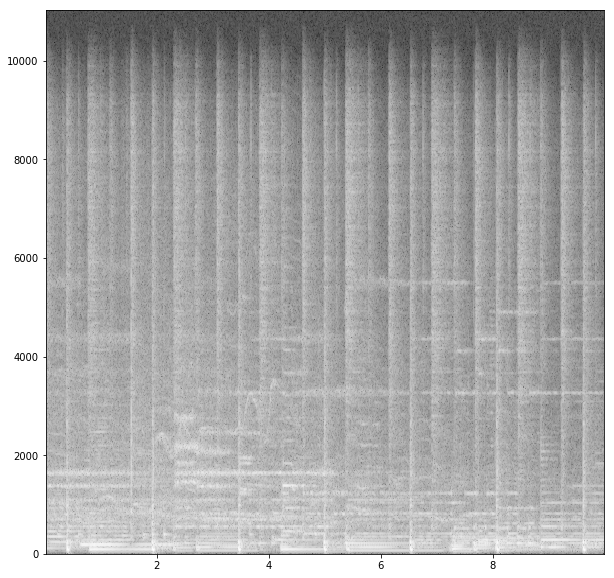

In [2]:
sample_rate, samples = wavfile.read('genres_wav/reggae/reggae.00001.wav')
samples = samples[:,0]

print(len(samples))
print(len(samples)/3)

# Take first third of sample
samples = samples[:220400]

NFFT = 1024  # the length of the windowing segments

fig = plt.figure(figsize=(10,10))
#ax1.plot(samples)
Pxx, freqs, bins, im = plt.specgram(samples, NFFT=NFFT, Fs=sample_rate, noverlap=900, cmap="gray")
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the matplotlib.image.AxesImage instance representing the data in the plot
plt.show()

Working on blues files
    converting blues.00061.wav


FileNotFoundError: [Errno 2] No such file or directory: 'genres_spectrograms/blues/blues.00061.wav.png'

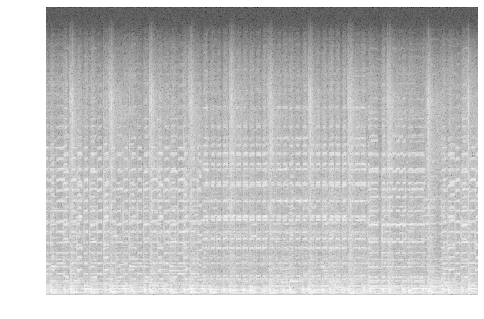

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
directory = 'genres_wav'

#styles = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
styles = ['blues']

fig,ax = plt.subplots(1)
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax.axis('tight')
ax.axis('off')

#fig = plt.figure(figsize=(10,10))
#plt.axis('off')

for style in styles:
    print("Working on "+style+" files")
    for filename in os.listdir(directory+"/"+style):
        if filename.endswith(".wav"):
            print("    converting "+filename)
            sample_rate, samples = wavfile.read('genres_wav/'+style+'/'+filename)
            samples = samples[:,0]

            # Take first third of sample
            samples = samples[:220400]

            NFFT = 1024  # the length of the windowing segments

            Pxx, freqs, bins, im = ax.specgram(samples, NFFT=NFFT, Fs=sample_rate, noverlap=900, cmap="gray")
            plt.savefig('genres_spectrograms/'+style+'/'+filename+'.png', bbox_inches='tight', pad_inches=0)
        else:
            pass

# Librosa spectrograms may be better ?

661200
220400.0


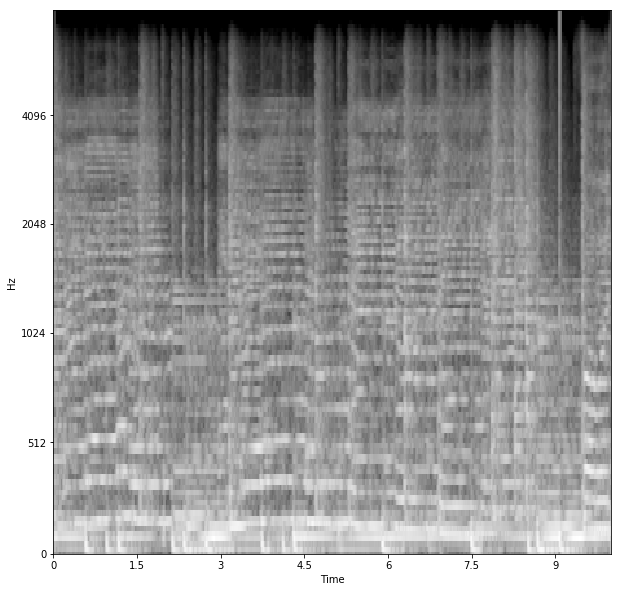

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

import pylab

sample_rate, samples = wavfile.read('genres_wav/rock/rock.00001.wav')
samples = samples[:,0]

print(len(samples))
print(len(samples)/3)

# Take first third of sample
samples = samples[:220400]

samples = samples / np.max(np.abs(samples))

# number of frequency bins (vertical resolution of the spectrogram)
n_mels = 128

S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=n_mels, n_fft=2048, hop_length=512, power=2.0)

fig = plt.figure(figsize=(10,10))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time', cmap="gray")

pylab.figure(figsize=(3,3))
pylab.axis('off') 
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time', cmap="gray")
pylab.savefig('test.jpg', bbox_inches=None, pad_inches=0)
pylab.close()

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
directory = 'genres_wav'

styles = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
#styles = ['blues']

# number of frequency bins (vertical resolution of the spectrogram)
n_mels = 128

# into how many spectrograms should a single song be splitted
n_splits = 3

for style in styles:
    print("Working on "+style+" files")
    for filename in os.listdir(directory+"/"+style):
        if filename.endswith(".wav"):
            print("    converting "+filename)
            sample_rate, samples = wavfile.read('genres_wav/'+style+'/'+filename)
            
            # make the sample mono
            samples = samples[:,0]
            
            # normalize samples
            samples = samples / np.max(np.abs(samples))

            # split the sample    
            splits = np.split(samples, n_splits)
            
            for i, split in enumerate(splits):
                S = librosa.feature.melspectrogram(y=split, sr=sample_rate, n_mels=n_mels, n_fft=2048, hop_length=512, power=2.0)

                pylab.figure(figsize=(3,3))
                pylab.axis('off') 
                pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
                librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time', cmap="gray")
                pylab.savefig('genres_spectrograms/'+style+'/'+filename+'-'+str(i)+'.png', bbox_inches=None, pad_inches=0)
                pylab.close()

Working on blues files
    converting blues.00061.wav
    converting blues.00095.wav
    converting blues.00051.wav
    converting blues.00080.wav
    converting blues.00044.wav
    converting blues.00039.wav
    converting blues.00020.wav
    converting blues.00010.wav
    converting blues.00015.wav
    converting blues.00068.wav
    converting blues.00067.wav
    converting blues.00019.wav
    converting blues.00058.wav
    converting blues.00089.wav
    converting blues.00075.wav
    converting blues.00002.wav
    converting blues.00093.wav
    converting blues.00033.wav
    converting blues.00059.wav
    converting blues.00092.wav
    converting blues.00069.wav
    converting blues.00055.wav
    converting blues.00064.wav
    converting blues.00056.wav
    converting blues.00022.wav
    converting blues.00000.wav
    converting blues.00086.wav
    converting blues.00072.wav
    converting blues.00041.wav
    converting blues.00038.wav
    converting blues.00021.wav
    converting b

ValueError: array split does not result in an equal division

## Network

In [ ]:
#import
%matplotlib inline

import PIL
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import random

from torchvision.transforms import Resize, ToTensor, Normalize, Compose, ToPILImage
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class Spectrogram1Model(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearModel, self).__init__()
        
        self.learning_rate = 0.0005
        
        
        self.layers = nn.Sequential(
            nn.Conv2d(1, 30, kernel_size=3, stride=1, padding=1),
            nn.relu(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.BatchNorm2d(30),
            # ...
            nn.Linear(1000, 10),
            nn.SoftMax()
        )
        self.loss_f = nn.CrossEntropyLoss()
        self.optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        
    def forward(self, input):
        input = input.view(input.size(0), 36*36)
        return self.layers(input)
    
    def train(self, loader, n_epochs):
        this.train()
        
        for epoch in range(n_epochs):
            pass
    
    def test(self, loader):
        this.eval()
        
        